# Plotting and Visualization
Python Computing for Data Science (AY250; [github](https://github.com/profjsb/python-seminar))

J. S. Bloom (2016)

### A reminder:
```bash
# git clone https://github.com/profjsb/python-seminar
cd python-seminar
git pull
```

If you plan on going through the notebooks with me, I strongly suggest that you copy the .ipynb files, e.g.:
```bash
cp a_plotting_and_viz_intro.ipynb my_a_plotting_and_viz_intro.ipynb
```
this will help avoid merge conflicts later on.

In [2]:
%run ../00_AdvancedPythonConcepts/talktools.py

By now you know the basics of:

- Numpy array creation and manipulation.
- Display of data in numpy arrays: path towards interactive exploratory work.


# Today's Plan


1. Plotting and visualization: overview & motivation
2. `Matplotlib` / `Seaborn`
3. 3d rendering with `matplotlib` and `mayavi`
4. Interactive with `matplotlib`, `widgets`, and `Bokeh`
5. "Big data" exploration with `datashader`
6. Collaborative with `Plot.ly`

<img src="https://www.evernote.com/l/AUVM_nsHxwxMU4IwxVdaZlTaOxRad1hL-lAB/image.png">
Source: B. Grainger (PyData 2016) https://www.youtube.com/watch?v=aRxahWy-ul8
[declarative: what should be done, imperative: how it should be done]

Hopefully after this week you will:

- Know how to make and polish figures to the point where they can go to a journal.
- Understand matplotlib's internal model enough to:
  - know where to look for knobs to fine-tune
  - better understand the help and examples online
  - use it as a development platform for complex visualization
- Be able to build basic interactive viz (in the browser)


# Plotting and visualization: overview & motivation

Major uses of plotting and viz in (data) science workflows:

  1. (Initial) **Understanding** - What's there? what's missing? What patterns are worth exploring? What more data do I need?
  2. **Exploration** - deeper dive into the "meaning". Often cyclical/iterative.
  3. **Presentation** - results, telling stories with data (and potentially allowing others to explore)
      - different requirements for data science vs science

## Always visualize your data!


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

# If you're reading in an image
# !conda install pillow -y
#import matplotlib.image as mpimg
#data = mpimg.imread("data/my_data_file.jpg")

# or read in a numpy array
import numpy as np
data = np.load("data/my_data_file.npy")

In [5]:
data.shape

(100, 100, 3)

In [6]:
import pandas as pd
df = pd.DataFrame(data[:,:,0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 100 columns):
0     100 non-null uint8
1     100 non-null uint8
2     100 non-null uint8
3     100 non-null uint8
4     100 non-null uint8
5     100 non-null uint8
6     100 non-null uint8
7     100 non-null uint8
8     100 non-null uint8
9     100 non-null uint8
10    100 non-null uint8
11    100 non-null uint8
12    100 non-null uint8
13    100 non-null uint8
14    100 non-null uint8
15    100 non-null uint8
16    100 non-null uint8
17    100 non-null uint8
18    100 non-null uint8
19    100 non-null uint8
20    100 non-null uint8
21    100 non-null uint8
22    100 non-null uint8
23    100 non-null uint8
24    100 non-null uint8
25    100 non-null uint8
26    100 non-null uint8
27    100 non-null uint8
28    100 non-null uint8
29    100 non-null uint8
30    100 non-null uint8
31    100 non-null uint8
32    100 non-null uint8
33    100 non-null uint8
34    100 non-null uint8
35    100 non-null u

In [7]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
count,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.00000,...,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.0,100.0,100.0,100.0
mean,156.0,156.0,156.0,156.0,156.0,156.0,156.0,156.0,155.980000,156.06000,...,153.900000,153.840000,151.77000,156.200000,156.060000,155.910000,156.0,156.0,156.0,156.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.082272,0.74968,...,9.802597,10.809386,14.33922,1.154701,1.229437,1.239868,0.0,0.0,0.0,0.0
min,156.0,156.0,156.0,156.0,156.0,156.0,156.0,156.0,152.000000,153.00000,...,96.000000,95.000000,97.00000,152.000000,153.000000,150.000000,156.0,156.0,156.0,156.0
25%,156.0,156.0,156.0,156.0,156.0,156.0,156.0,156.0,156.000000,156.00000,...,156.000000,156.000000,156.00000,156.000000,156.000000,156.000000,156.0,156.0,156.0,156.0
50%,156.0,156.0,156.0,156.0,156.0,156.0,156.0,156.0,156.000000,156.00000,...,156.000000,156.000000,156.00000,156.000000,156.000000,156.000000,156.0,156.0,156.0,156.0
75%,156.0,156.0,156.0,156.0,156.0,156.0,156.0,156.0,156.000000,156.00000,...,156.000000,156.000000,156.00000,156.000000,156.000000,156.000000,156.0,156.0,156.0,156.0
max,156.0,156.0,156.0,156.0,156.0,156.0,156.0,156.0,161.000000,160.00000,...,161.000000,166.000000,161.00000,159.000000,162.000000,162.000000,156.0,156.0,156.0,156.0


In [8]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
95,156,156,156,156,156,156,156,156,156,156,...,156,156,156,156,156,156,156,156,156,156
96,156,156,156,156,156,156,156,156,156,156,...,156,156,156,156,156,156,156,156,156,156
97,156,156,156,156,156,156,156,156,156,156,...,156,156,156,156,156,156,156,156,156,156
98,156,156,156,156,156,156,156,156,156,156,...,156,156,156,156,156,156,156,156,156,156
99,156,156,156,156,156,156,156,156,156,156,...,156,156,156,156,156,156,156,156,156,156


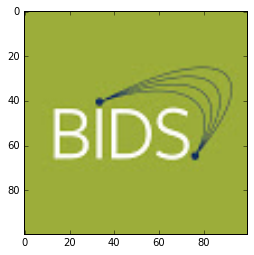

In [10]:
plt.imshow(data)
plt.show()

Looking at your data not just for images/arrays. Critical for point data too.

### Anscombe's Quartet

<p><a href="https://commons.wikimedia.org/wiki/File:Anscombe%27s_quartet_3.svg#/media/File:Anscombe%27s_quartet_3.svg"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/1200px-Anscombe%27s_quartet_3.svg.png" alt="Anscombe's quartet 3.svg"></a><br>By <a href="//commons.wikimedia.org/wiki/File:Anscombe.svg" title="File:Anscombe.svg">Anscombe.svg</a>: <a href="//commons.wikimedia.org/wiki/User:Schutz" title="User:Schutz">Schutz</a>
derivative work (label using subscripts): <a href="//commons.wikimedia.org/wiki/User:Avenue" title="User:Avenue">Avenue</a> (<a href="//commons.wikimedia.org/wiki/User_talk:Avenue" title="User talk:Avenue"><span class="signature-talk">talk</span></a>) - <a href="//commons.wikimedia.org/wiki/File:Anscombe.svg" title="File:Anscombe.svg">Anscombe.svg</a>, <a href="http://creativecommons.org/licenses/by-sa/3.0" title="Creative Commons Attribution-Share Alike 3.0">CC BY-SA 3.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=9838454">https://commons.wikimedia.org/w/index.php?curid=9838454</a></p>

<img src="https://www.evernote.com/l/AUX2p-SfsmVAyZk9cnT7OqaI55Ru3JOmlMkB/image.png">

https://en.wikipedia.org/wiki/Anscombe%27s_quartet

In [11]:
from IPython.display import HTML
HTML("""
<video width="620" controls>
  <source src="https://pbs.twimg.com/tweet_video/CrIDuOhWYAAVzcM.mp4" type="video/mp4">
</video>
""")

From https://twitter.com/JustinMatejka/status/770682771656368128"
Called ... Anscombosaurus

## How you decide to show data is part of the story itself

Some basic thoughts:

 1. No more lines, colors, points than you need to tell the story
 2. But, no removing data for no other reason that it doesn't tell your story
 3. Figures for talks and publications should be (almost) self-describing. An expert in your field should get the point.
 4. Figures are the centerpiece of your paper: most people will remember a visual better than they'll remember your abstract.
 5. I usually build the figures first, then write the meaty sections, then the conclusions, then the abstract, then the title.
 
"Ten Simple Rules for Better Figures":
http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833

## Pie Charts: no.

Only two exceptions where this is ok...

<img src="http://i1.wp.com/flowingdata.com/wp-content/uploads/2008/09/Pie-I-have-Eaten.jpg">

<img src="https://i0.wp.com/flowingdata.com/wp-content/uploads/2014/12/Pie-Pyramid-e1417455667996.png">

## Bring on the box plots

<img src="http://www.nature.com/nmeth/journal/v11/n2/images/nmeth.2813-F1.jpg">

Sample BoxPlotR plots. Top: Simple Tukey-style box plot. Bottom: Tukey-style box plot with notches, means (crosses), 83% confidence intervals (gray bars; representative of p=0.05 significance) and n values.

http://blogs.nature.com/methagora/2014/01/bring-on-the-box-plots-boxplotr.html

<img src="http://www.nature.com/nature/journal/v480/n7377/images/nature10646-f2.2.jpg" width="60%">

**Progenitor system constraints in a Hertzsprung–Russell diagram.**  Li, Bloom, et al., Nature 480, 348–350 (15 December 2011)